In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Index(['User_ID', 'Name', 'Age', 'Country', 'Subscription_Type',
       'Watch_Time_Hours', 'Favorite_Genre', 'Last_Login'],
      dtype='object')


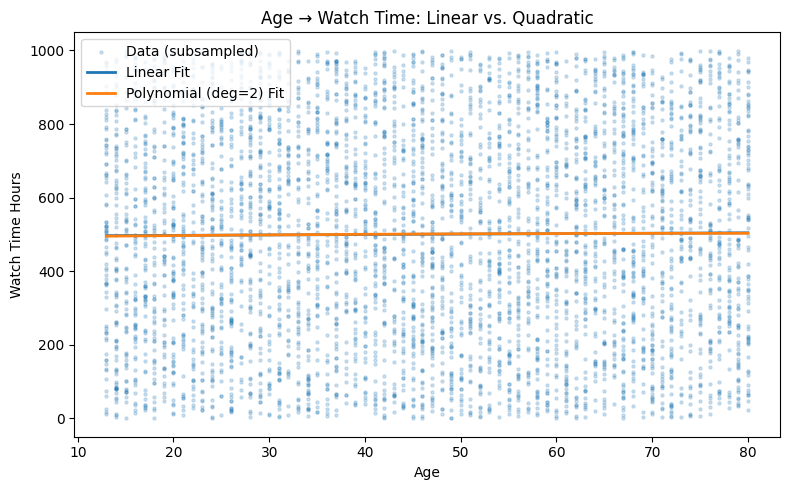

In [ ]:
file_path = "../data/netflix_users.csv"
df = pd.read_csv(file_path)
print(df.columns)
X = df[["Age"]].values    # shape (n_samples, 1)
y = df["Watch_Time_Hours"].values

lin_reg = LinearRegression().fit(X, y)
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin",  LinearRegression())
]).fit(X, y)

# Build a smooth Age grid for plotting the lines
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_lin  = lin_reg.predict(X_plot)
y_poly = poly_reg.predict(X_plot)
max_points = 5000
if len(X) > max_points:
    idx = np.random.RandomState(42).choice(len(X), size=max_points, replace=False)
else:
    idx = np.arange(len(X))

# Plot
plt.figure(figsize=(8, 5))

plt.scatter(
    X[idx], y[idx],
    s=5,
    alpha=0.2,
    label="Data (subsampled)"
)

plt.plot(X_plot, y_lin,  linewidth=2, label="Linear Fit")
plt.plot(X_plot, y_poly, linewidth=2, label="Polynomial (deg=2) Fit")

plt.xlabel("Age")
plt.ylabel("Watch Time Hours")
plt.title("Age → Watch Time: Linear vs. Quadratic")
plt.legend()
plt.tight_layout()
plt.show()


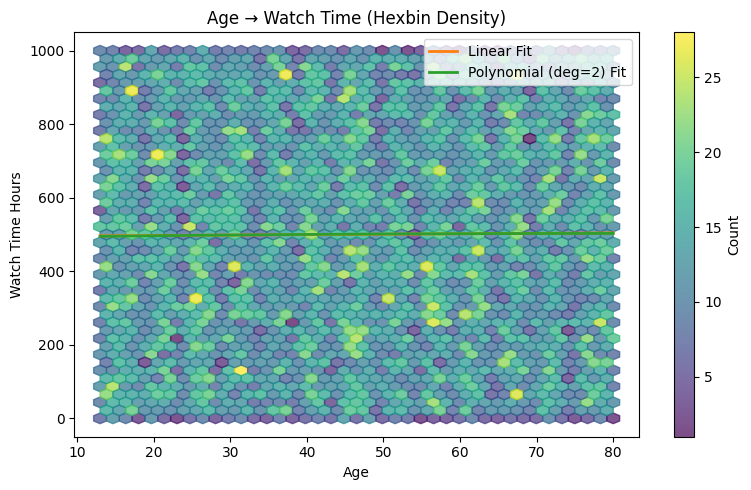

In [ ]:

plt.figure(figsize=(8, 5))
hb = plt.hexbin(
    X.flatten(), y,
    gridsize=40, mincnt=1, alpha=0.7
)
plt.plot(X_plot, y_lin,  color="C1", lw=2, label="Linear Fit")
plt.plot(X_plot, y_poly, color="C2", lw=2, label="Polynomial (deg=2) Fit")
plt.colorbar(hb, label="Count")
plt.xlabel("Age")
plt.ylabel("Watch Time Hours")
plt.title("Age → Watch Time (Hexbin Density)")
plt.legend()
plt.tight_layout()
plt.show()

# por cada punto, la media del dataset que es watch time hours es casi la misma para cada edad
# aplicar una normal a los datos 